# Quantum teleportation
according to https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information/entanglement-in-action#teleportation

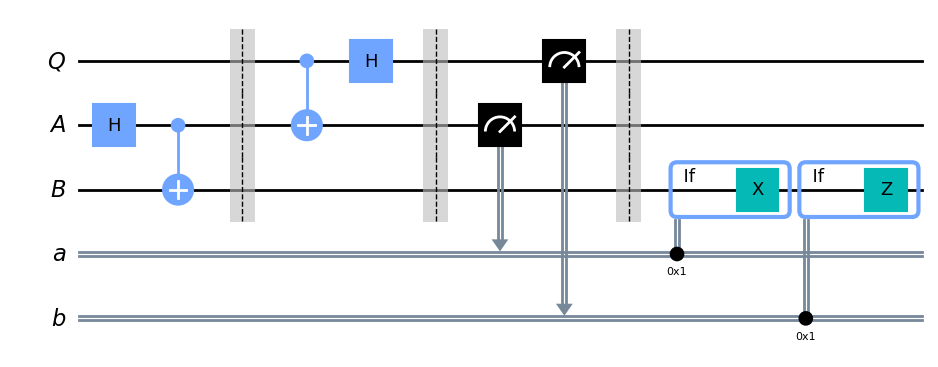

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

protocol.draw("mpl")

In [4]:
from qiskit.circuit.library import UGate
from numpy import pi, random

random_gate = UGate(
    theta=random.random()*2*pi,
    phi=random.random()*2*pi,
    lam=random.random()*2*pi
)

display(random_gate.to_matrix())

array([[-0.9719764 +0.j        , -0.23294271+0.03161589j],
       [ 0.06455515-0.22604093j, -0.13879418+0.96201575j]])

Now we'll create a new testing circuit that first applies our random gate to Q,\mathsf{Q},Q, then runs the teleportation circuit, and finally applies the inverse of our random gate to the qubit B\mathsf{B}B and measures. The outcome should be 000 with certainty.

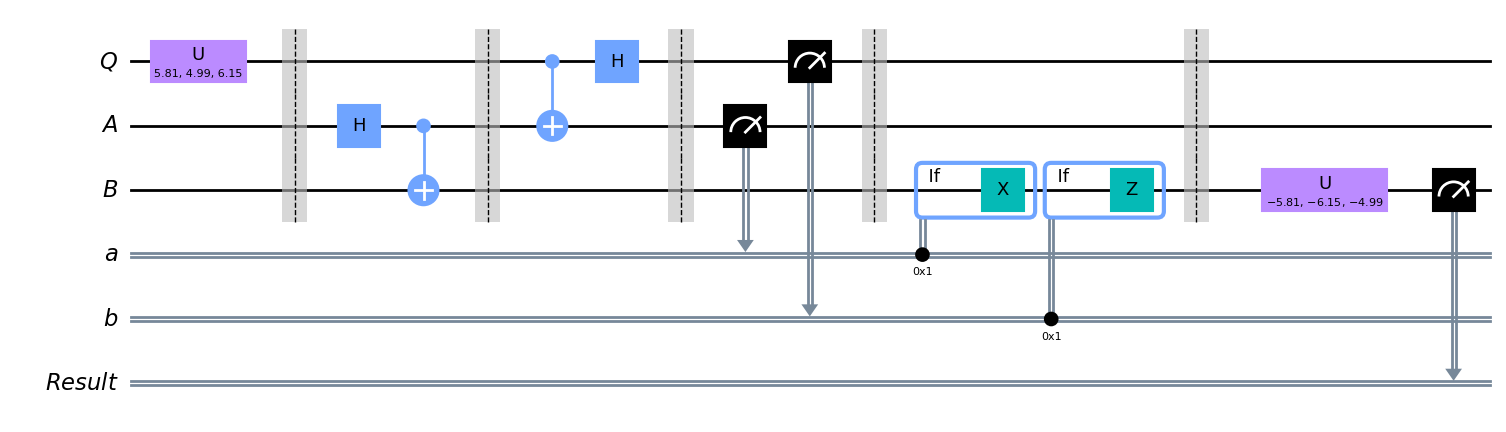

In [6]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

test.draw("mpl")

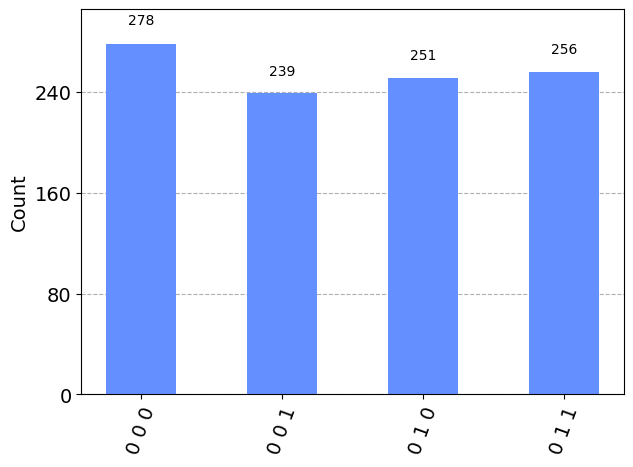

In [8]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

result = AerSimulator().run(test).result()
statistics = result.get_counts()
plot_histogram(statistics)

so here I want to test, if I can teleport the excited state 1

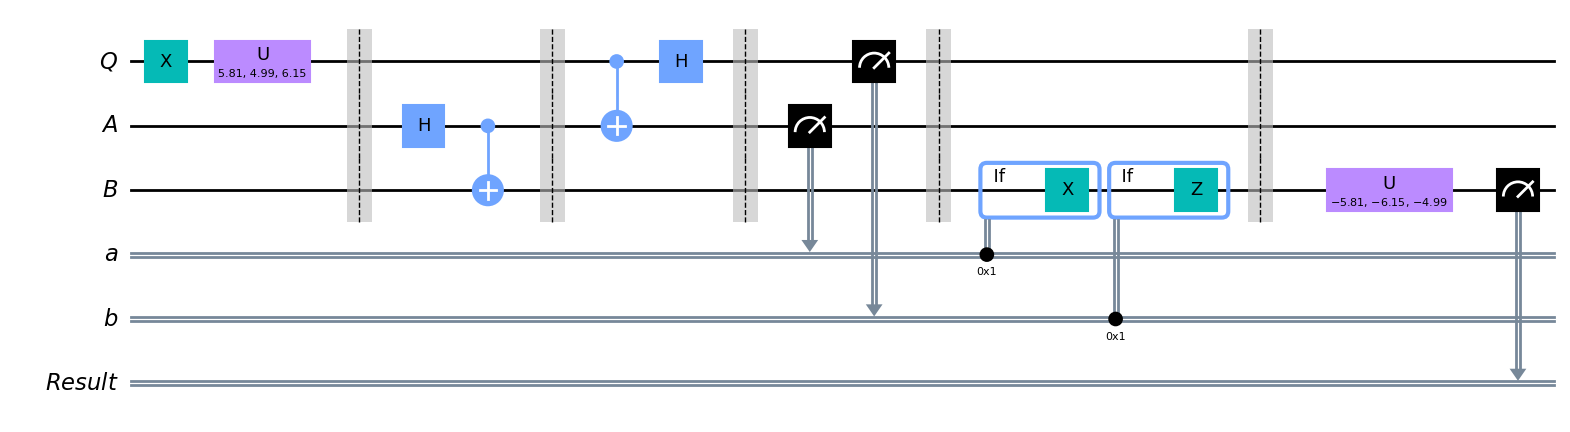

In [10]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

#here the excited state is inserted
test.x(qubit)

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

test.draw("mpl")

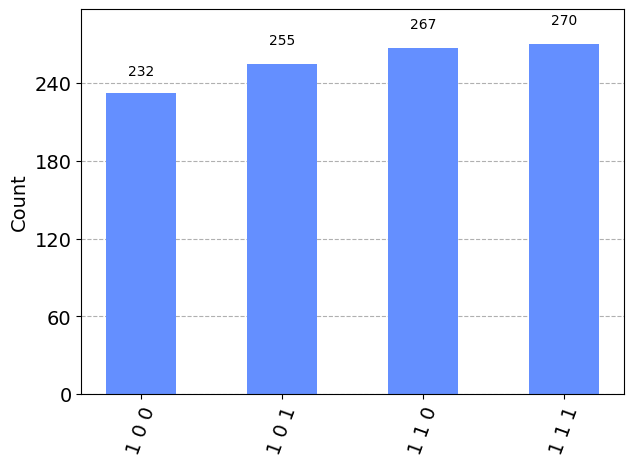

In [11]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
plot_histogram(statistics)